In [9]:
# encoding: utf-8

'''
@file: wav_process.py
@time: 2022/10/19
@author: Glacier
'''

import os
import subprocess




In [10]:
# # 添加文件输入输出路径
# input_path = "D:\\BaiduNetdiskDownload\\wav_file\\wav_file\\"
# output_path = "D:\\BaiduNetdiskDownload\\wav_file\\wav_file16\\"
# for file in os.listdir(input_path):
#     file1 = input_path + file
#     file2 = output_path + file
#     cmd = "C:\\Users\\DELL\\Downloads\\ffmpeg-n6.0-34-g3d5edb89e7-win64-lgpl-6.0\\bin\\ffmpeg.exe -i " + file1 + " -ar 16000 " + file2  #ffmpeg -i 输入文件 -ar 采样率  输出文件
#     #cmd = "ffmpeg.exe -i " + file1 + " -ar 16000 " + file2  #ffmpeg -i 输入文件 -ar 采样率  输出文件
#     subprocess.call(cmd, shell=True)

In [11]:
# from scipy.io import wavfile
# for file in os.listdir(input_path):
#     file1 = input_path + file
#     file2 = output_path + file
#     sample_rate, sig = wavfile.read(file1)
#     print(sample_rate)
#     print(sig)
#     print(sig.dtype)
#     sample_rate, sig = wavfile.read(file2)
#     print(sample_rate)
#     print(sig)
#     print(sig.dtype)

# 提取每个soundClipMat_音频数据保存为wav

In [12]:
import scipy.io as scio
import wave
import numpy as np
import soundfile
for  HS in [44,45,47,48,50,54,71]:
    fs_ori = 24414
    fs_out_put = 16000
    clean_path = "D:\\BaiduNetdiskDownload\\HS"+str(HS)+"\\result"
    if HS < 70:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_bu","overt_du","overt_gu"]
    else:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_pa","overt_ta","overt_ka","overt_sa","overt_sha"]
    sound_title = "soundClipMat_"
    ecog_title = "ECoG_"
    save_path = "24414_wav\\"+"HS"+str(HS) +"\\"
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    for file in os.listdir(clean_path):
        if file.startswith("HS"):
            if file.endswith(".mat"):
                print(file)
                file_one = scio.loadmat(os.path.join(clean_path,file))
                for sound_type in sound_list:
                    print(sound_type)
                    print(file_one[ecog_title+sound_type].shape)
                    for index in range(file_one[sound_title+sound_type].shape[0]):
                        soundname = "24414_wav\\"+"HS"+str(HS) +"\\"+ file[:4]+"_"+sound_type+"_"+str(index)+".wav"
        
                        soundfile.write(soundname,file_one[sound_title+sound_type][index],fs_ori)


HS44_Block_overt_covert.mat
overt_ba
(68, 128, 400)
overt_da
(52, 128, 400)
overt_ga
(55, 128, 400)
overt_bu
(56, 128, 400)
overt_du
(44, 128, 400)
overt_gu
(65, 128, 400)
HS45_Block_overt_covert.mat
overt_ba
(60, 256, 400)
overt_da
(63, 256, 400)
overt_ga
(55, 256, 400)
overt_bu
(55, 256, 400)
overt_du
(70, 256, 400)
overt_gu
(50, 256, 400)
HS47_Block_overt_covert.mat
overt_ba
(60, 256, 400)
overt_da
(54, 256, 400)
overt_ga
(55, 256, 400)
overt_bu
(55, 256, 400)
overt_du
(65, 256, 400)
overt_gu
(55, 256, 400)
HS48_Block_overt_covert.mat
overt_ba
(50, 256, 400)
overt_da
(60, 256, 400)
overt_ga
(55, 256, 400)
overt_bu
(45, 256, 400)
overt_du
(75, 256, 400)
overt_gu
(55, 256, 400)
HS50_Block_overt_covert.mat
overt_ba
(60, 256, 400)
overt_da
(60, 256, 400)
overt_ga
(59, 256, 400)
overt_bu
(60, 256, 400)
overt_du
(60, 256, 400)
overt_gu
(60, 256, 400)
HS54_Block_overt_covert.mat
overt_ba
(55, 256, 400)
overt_da
(60, 256, 400)
overt_ga
(65, 256, 400)
overt_bu
(62, 256, 400)
overt_du
(55, 25

# 把24414Hz转为16000Hz音频

In [13]:
# 添加文件输入输出路径
for  HS in [44,45,47,48,50,54,71]:
    input_path = "24414_wav\\HS"+str(HS)+"\\"
    output_path = "16000_wav\\HS"+str(HS)+"\\"
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    for file in os.listdir(input_path):
        file1 = input_path + file
        file2 = output_path + file
        cmd = "C:\\Users\\DELL\\Downloads\\ffmpeg-n6.0-34-g3d5edb89e7-win64-lgpl-6.0\\bin\\ffmpeg.exe -i " + file1 + " -ar 16000 " + file2  #ffmpeg -i 输入文件 -ar 采样率  输出文件
        #cmd = "ffmpeg.exe -i " + file1 + " -ar 16000 " + file2  #ffmpeg -i 输入文件 -ar 采样率  输出文件
        subprocess.call(cmd, shell=True)


# 送入服务器转换为trace

In [35]:
testdata = np.load("output_dir/24414_wavHS48_overt_da_31.npy")


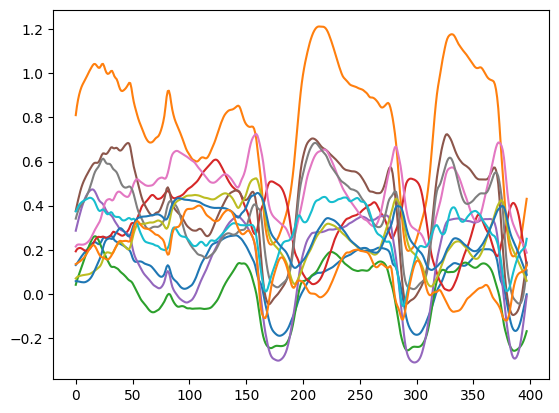

In [36]:

plt.plot(testdata[:,:12])


In [15]:


import scipy.io as scio
import wave
import numpy as np
for  HS in [44,45,47,48,50,54,71]:
    import soundfile
    fs_ori = 24414
    fs_out_put = 16000
    trace_path = "output_dir\\HS"+str(HS)+"_output"
    trace_con_path = "at_dir"
    if HS < 70:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_bu","overt_du","overt_gu"]
    else:
        sound_list = ["overt_ba","overt_da","overt_ga","overt_pa","overt_ta","overt_ka","overt_sa","overt_sha"]
    
    sound_title = "soundClipMat_"
    clean_path = "D:\\BaiduNetdiskDownload\\HS"+str(HS)+"\\result"
    for file in os.listdir(clean_path):
        if file.startswith("HS"):
            if file.endswith(".mat"):
                print(file)
                file_one = scio.loadmat(os.path.join(clean_path,file))
                file_two = {}
                for sound_type in sound_list:
                    file_two[sound_title+sound_type] = np.zeros((file_one[sound_title+sound_type].shape[0],398,12))
                    for index in range(file_one[sound_title+sound_type].shape[0]):
                        tracename = trace_path+"\\" + file[:4]+"_"+sound_type+"_"+str(index)+".npy"
                        temp = np.load(tracename)
                        file_two[sound_title+sound_type][index] = temp[:,:12]
                hsblock = trace_con_path+"\\"+file[:4]+"trace.npy"
                np.save(hsblock,file_two)


HS44_Block_overt_covert.mat
HS45_Block_overt_covert.mat
HS47_Block_overt_covert.mat
HS48_Block_overt_covert.mat
HS50_Block_overt_covert.mat
HS54_Block_overt_covert.mat
HS71_Block_overt_covert.mat


44100


0

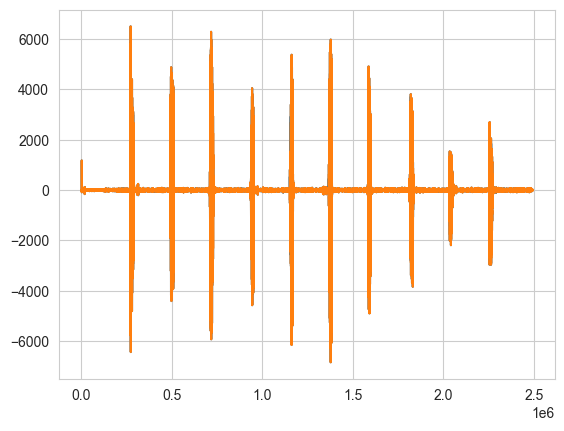

In [4]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

input_file_path = "D:\\BaiduSyncdisk\\test4.wav"
output_file_path = "D:\\BaiduSyncdisk\\test4_16000.wav"
sample_rate, sig = wavfile.read(input_file_path)
print(sample_rate)
plt.plot(np.squeeze(sig))
cmd = "C:\\Users\\DELL\\Downloads\\ffmpeg-n6.0-34-g3d5edb89e7-win64-lgpl-6.0\\bin\\ffmpeg.exe -i " + input_file_path + " -ac 1 -ar 16000 " + output_file_path  #ffmpeg -i 输入文件 -ar 采样率  输出文件
subprocess.call(cmd)

In [5]:
test_at = np.load("test4_16000.npy")

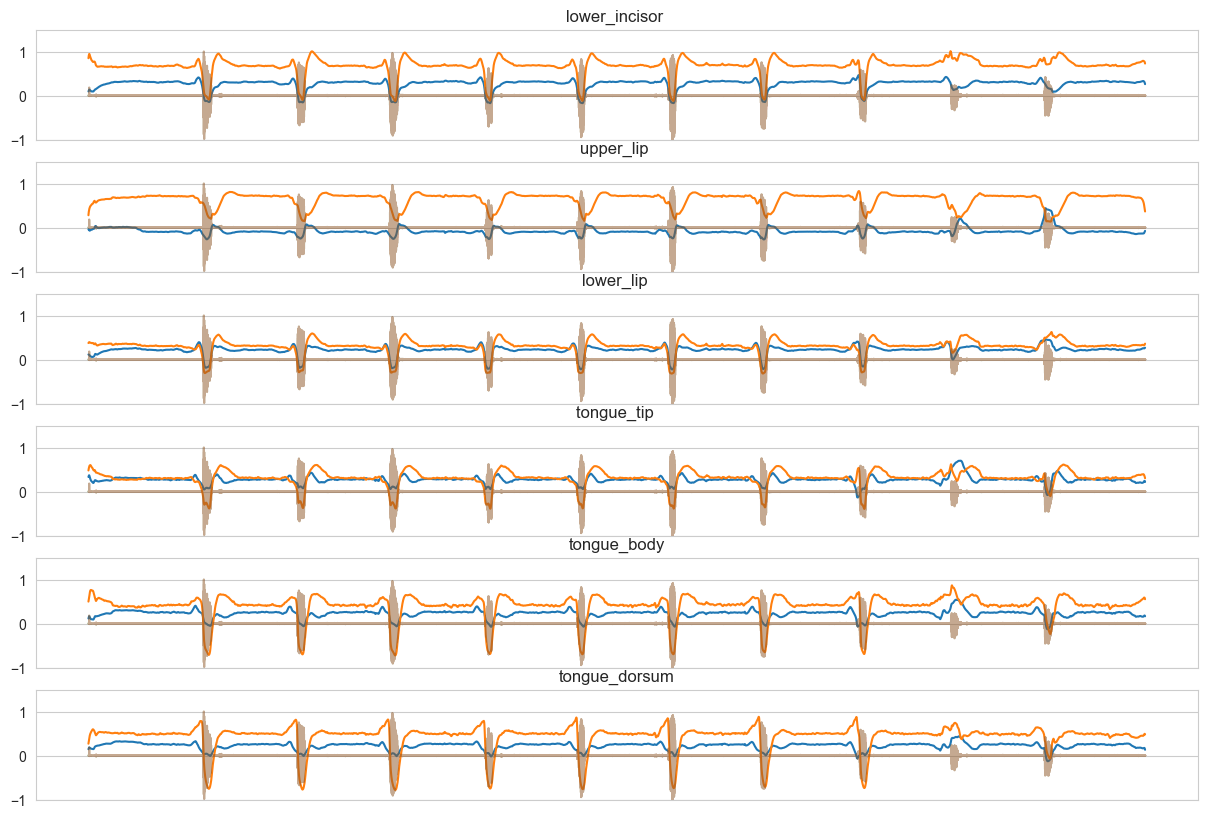

In [6]:
plt.figure(figsize=(15,10))
trace_labels = ["lower_incisor ","upper_lip ","lower_lip ","tongue_tip ","tongue_body","tongue_dorsum"]
trace_xlabels = ["ba","da","ga","pa","ta","ka","sa","sha","du","di"]
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(test_at[:,2*i])
    plt.plot(test_at[:,2*i+1])
    plt.plot(np.linspace(0,len(test_at[:,2*i]),len(np.squeeze(sig))),np.squeeze(sig)/np.max(sig),alpha = 0.3)
    plt.ylim([-1,1.5])
    plt.xticks([])
    plt.title(trace_labels[i])

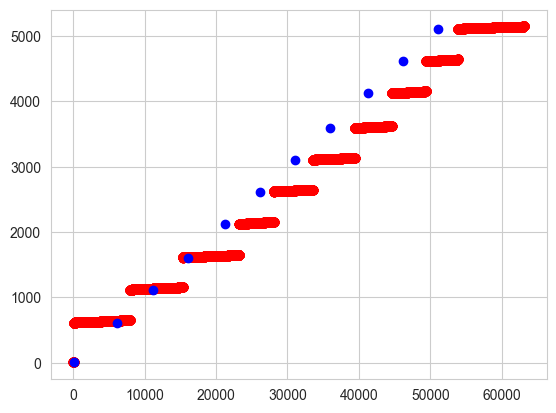

In [7]:
plt.plot(np.squeeze(np.where(sig>0.1*np.max(sig))[0]/44100*100),'ro')
t = np.squeeze(np.where(sig>0.1*np.max(sig))[0]/44100*1000)
temp_list = []
temp_list.append(t[0])
for i in range(1,len(t)):
    if t[i]>(t[i-1]+(4634-91)/10):
        temp_list.append(t[i])
plt.plot(temp_list,np.array(temp_list)/10,'bo')

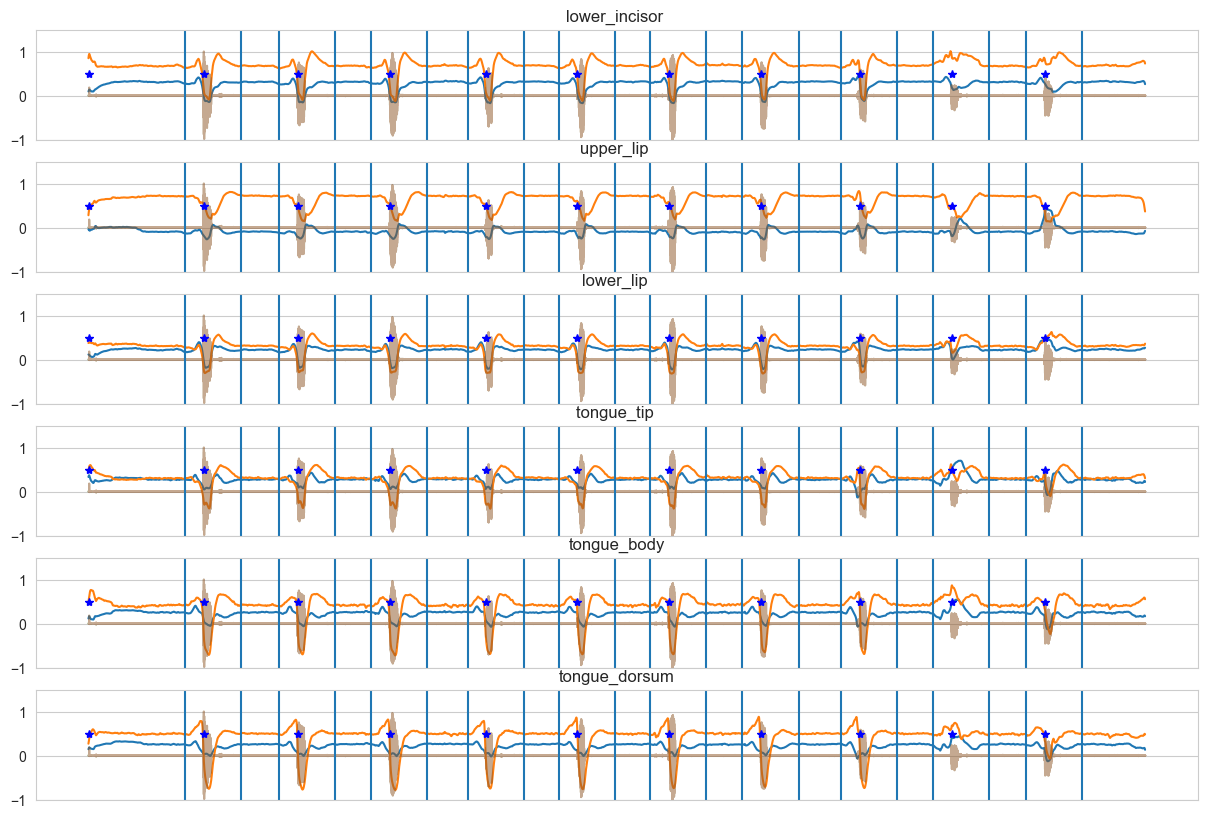

In [14]:
plt.figure(figsize=(15,10))
trace_labels = ["lower_incisor ","upper_lip ","lower_lip ","tongue_tip ","tongue_body","tongue_dorsum"]
trace_xlabels = ["ba","da","ga","pa","ta","ka","sa","sha","du","di"]
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(test_at[:,2*i])
    plt.plot(test_at[:,2*i+1])
    plt.plot(np.linspace(0,len(test_at[:,2*i]),len(np.squeeze(sig))),np.squeeze(sig)/np.max(sig),alpha = 0.3)
    plt.plot(np.array(temp_list)/10,0.5*np.ones([len(temp_list)]),'b*')
    for j in range(1,len(temp_list)):

        plt.axvline(x=temp_list[j]/10-100,ymin=-1, ymax=1.5)
        plt.axvline(x=temp_list[j]/10+200,ymin=-1, ymax=1.5)
    plt.ylim([-1,1.5])
    plt.xticks([])
    plt.title(trace_labels[i])

In [21]:
distance_matrix = np.zeros([10,12,300])
for i in range(1,len(temp_list)):
    x,y = int(temp_list[i]/10-100),int(temp_list[i]/10+200)
    distance_matrix[i-1] = test_at[x:y,:12].T


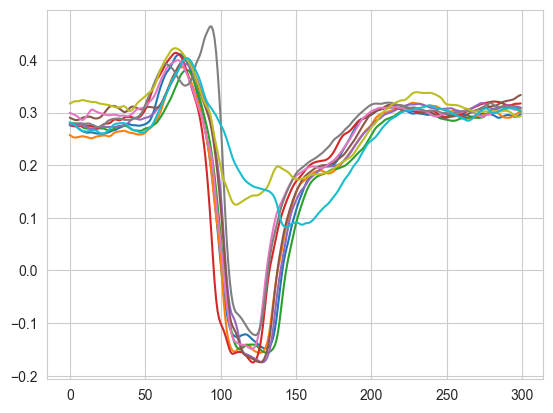

In [24]:
plt.plot(distance_matrix[:,0,:].T)

MDS降维结果：
[[ 1.85807058 -1.25856418]
 [ 0.22276062 -0.88647716]
 [ 3.36762916  0.03318741]
 [-2.17450683 -2.75454738]
 [ 1.93535317  1.67011682]
 [ 0.54359857  1.62907529]
 [-2.78704382 -1.02337674]
 [-2.96586145  2.59058593]]


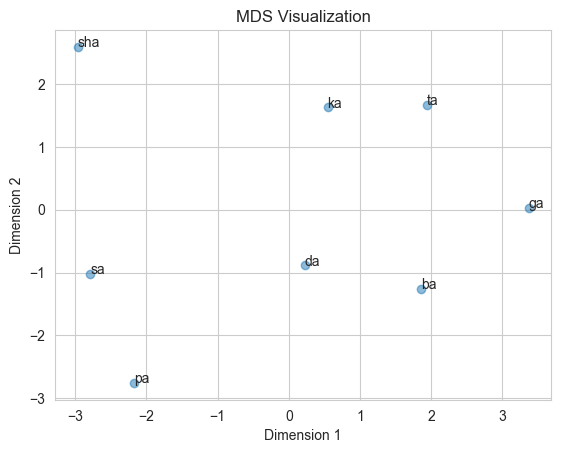

[Text(0.5, 0, 'ba'),
 Text(1.5, 0, 'da'),
 Text(2.5, 0, 'ga'),
 Text(3.5, 0, 'pa'),
 Text(4.5, 0, 'ta'),
 Text(5.5, 0, 'ka'),
 Text(6.5, 0, 'sa'),
 Text(7.5, 0, 'sha')]

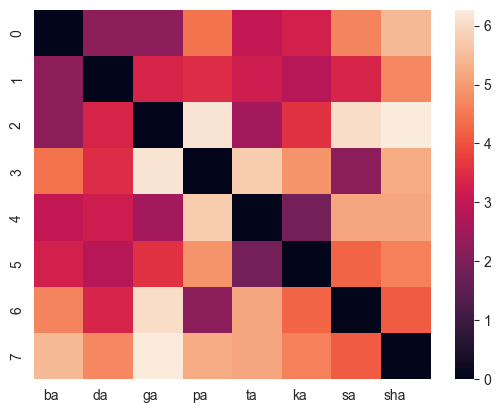

In [39]:
import numpy as np
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt

distance_matrix_flutten = []
for i in range(10):
    distance_matrix_flutten.append(distance_matrix[i].reshape(-1))

distance_matrix_flutten = np.array(distance_matrix_flutten)
n_sample = 8
distance_matrix_pairwise = np.ones([n_sample,n_sample])
for i in range(n_sample):
    for j in range(n_sample):
        if i == j:
            distance_matrix_pairwise[i,j] = 0
        if i<j:
            distance_matrix_pairwise[i,j] = np.linalg.norm(distance_matrix_flutten[i]-distance_matrix_flutten[j])
        if i>j:
            distance_matrix_pairwise[i,j] = distance_matrix_pairwise[j,i]

# 初始化MDS模型
mds = MDS(n_components=2, dissimilarity='precomputed')

# 进行MDS分析
mds_result = mds.fit_transform(distance_matrix_pairwise)

# 打印降维结果
print("MDS降维结果：")
print(mds_result)
voice_list = ["ba","da","ga","pa","ta","ka","sa","sha","di","du"]
# 可视化结果
plt.scatter(mds_result[:, 0], mds_result[:, 1],alpha=0.5)
for i, (x, y) in enumerate(mds_result):
    plt.text(x, y,voice_list[i] )
plt.title("MDS Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
plt.figure()
ax = sns.heatmap(distance_matrix_pairwise)
ax.set_xticklabels(labels=voice_list[:n_sample],rotation = 0,horizontalalignment="right")
